#PHYS270 Assignment 10: ODEs and Runge-Kutta method
Student name: Begantsova Milana



---
##Abstract
In this programming assignment, we are given a differential equation (later ODE) of second order. We will implement Midpoint and Runge-Kutta methods to approximate numerical solution of given ODE. Then all approximations will be drawn in the same frame to judge their accuracy visually. The optimality of the method will be judged upon accuracy and computational cost required. According to the results of the experiment, the most optimal method is Midpoint method. All methods provided solution to ODE within the same $\Delta t$ and accuracy of $0.1\%$, but Midpoint method requires minimum calculations. 

---
##Introduction
Many physical, chemical, economical, biological and other processes can be expressed more easily through a differential equation. For example, there are population growth, radioactive decay problems. It is not always convinient to solve those ODE-s analytically since as scientists we can deal with multiple ODE-s at the same time. It will be a good approach to approximate numerical solutions to our equations. 

The goal of this experiment is to study how we can solve such differential equations through Midpoint method (also known as Runge-Kutta of second order) and Runge-Kutta of third, fourth and fifth orders. All of them are based on the same idea, but they calculate final gradient in a different way (thus some of them require more calculations than others).

We need to solve next differential equation of the second order:
$$\frac{d^2y}{dx}+4y=0$$
with next initial conditions $y(0)=1$ and $y'(0)=0$.

At first, I will provide an analytical solution to ODE, which I will consider as 'ideal' one. The analytical result will be used to calculate a percentage rms error.

Usually Runge-Kutta similar methods are used to solve ODE-s of the first order, so the experiment also requires some mathematical analysis of how method can be adapted to ODE-s of second order.

After this analysis, I will finally implement a Midpoint method and Runge-Kutta method. The formulas for this methods will be taken from the book. I will iterative determine the $\Delta t$ required to achief accuracy of $0.1 \%$ and measure time required for each method.

At the end I will represent solution of each method in the same frame and construct a summative table with results of the experiment.

---
##Methods

In this programming assignment, we are going to use Midpoint Method, also known as Runge-Kutta of second order, and Runge-Kutta method of highier orders. I would like to give an idea of Runge-Kutta method based on Euler method. 

Graphically $\frac{dx}{dt}$ is a slope of some function. So, if we know the initial value of function $x$ at some point $t_0$, we can draw this function (see Figure 1). 
<center>
  <img src="https://www.researchgate.net/profile/Rishika-Mohanta/publication/333678760/figure/fig1/AS:768450284773377@1560224233690/Eulers-method-The-dashed-line-shows-the-solution-computed-by-successive-iterations-of.png" height="400">
  <p>Figure 1 – Euler method graphical representation</p>
</center>

At the Figure 1, you can see how Euler method approximates some curve. We can assume that if we decrease $\Delta t$, the approximation will be much smoother and closer to the solution of ODE. The formula for Euler method is
$$x_{i+1}=x_i+ f(t_i, x_i)\Delta t$$
where $f(t_i, x_i)$ is function of slope.

But then scientists figure out that approximation will be much better if we use an average of different slopes by some principle. And they come up with Midpoint Method that uses the combination of two slopes by formulas:
$$y_{i+1}=y_i+k_2\Delta t$$
$k_1=f(t_i, x_i)$ \
$k_2=f(t_i+\frac{1}{2}\Delta t, x_i+\frac{1}{2}k_1\Delta t)$

The graphically Midpoint method can be expressed as:
<center>
  <img src="https://www.researchgate.net/profile/Paulo-Flores-4/publication/299354655/figure/fig12/AS:342540160126983@1458679346285/Geometric-interpretation-of-the-second-order-Runge-Kutta-method.png" height="350">
  <p>Figure 2 – Midpont method graphical representation</p>
</center>


Runge-Kutta of third and highier orders uses the same idea but combines even more different slopes based on its order. I will place all needed formulas for combinations while the Experiment part. I can assume that the final function for both Midpoint method and Runge-Kutta will be almost the same except formula for slope. 

With highier order I assume that computational cost will be increasing since we are required to increase number of slopes used. But it is expected that highier order will give a more accurate approximation with smaller number of subintervals (bigger $\Delta t$).


I suppose that I will write singular function to which I will pass a formula for the coefficients. As the only difference between those methods will be this formula, I will be able to judge objectively how computationally costly each method. 

It is specified by the problem definition that we need to get approximations to the same accutacy of $0.1\%$. The accuracy will be calculated using root mean square formula since we deal with multiple data points. Since the given ODE has an analytical solution, I will use this solution and call it "theory", while approximation with Runge-Kutta will be called "measured". Then the final formula for error $\varepsilon$ can be written as:
$$\varepsilon = \frac{\sum_{i=1}^{n}(theory - measured)^2}{n}\cdot 100\%$$


Using brute force approach, I will identify the required $\Delta t$ and measure execution time using built-in magic function `%timeit` with passed parameter `-o` so that I will be able to store the result of measurement and use it later on while discussion. We have already used this function multiple times in the previous programming assignments and it has recommended itself as useful tool that can determine the required number of measurements on its own.

All of the approximations will be stored as numpy array and plotted in the same frame using matplolib library to judge how visually method approximates analytical solution. But I don't think that in our analysis the graphical method will be useful since we approximate analytical solution to the same acuracy. All plots will overlap each other. So, we will judge methods mainly based on time execution.

---
##Experiment

###Initial preparation

We are given a simple ODE of the second order which can be solved using charateristic equation:
$$\frac{d^2y}{dx}+4y=0$$
Initial conditions $y(0)=1$ and $y'(0)=0$.

Characteristic equation:
$$r^2+4=0, \ r_{1,2}=\pm 2i$$

Since roots are imaginary, the general solution to our ODE can be written as:
$$y(x)=C_1cos(2x)+C_2sin(2x)$$

We are given initial conditions, so we can solve linear system of equations to calculate $C_1$ and $C_2$. So, the final solution to our ODE can be written as following:
$$y(x) = cos(2x)$$

In [ ]:
#import all neccessary libraries
import numpy as np
import matplotlib.pyplot as plt

At first, lets write down all needed constants that we will use during our calculations:

In [ ]:
# the boundaries for t
t_i = np.float128(0)
t_f = np.float128(4)

# initial conditions, z_0 states for y'(0)
y_0, z_0 = 1, 0

# pack all data for convinience as a list
initial_data = [t_i, t_f, y_0, z_0]

# required accuracy
eps = 0.1

Now, lets have a look how the analytical solutions look like. To do so, we need to generate needed numpy arrays:

In [ ]:
x_theory = np.linspace(t_i, t_f, 1000, dtype = np.float128)
y_theory = np.cos(2 * x_theory)

And write a function `graph(data)` in advance for further ploting of our solutions.

In [ ]:
def graph(data):
  fig, ax = plt.subplots(figsize = (10,8))
  
  # graph settings
  ax.set_title(data['title'], fontsize=20)
  ax.set_xlabel(data['x_label'], fontsize=15)
  ax.set_ylabel(data['y_label'], fontsize=15)
  if (data['axis']):
    ax.spines['bottom'].set_position('center')
  
  # plot solutions
  for x, y, lab in zip(data['x'], data['y'], data['label']):
    ax.plot(x, y, label=lab, linestyle='dashed')
  
  ax.legend()
  plt.grid()
  plt.show()

The dictionary data will store 𝑥 , 𝑦 values for plots and required settings of plot such as labels, title and etc.

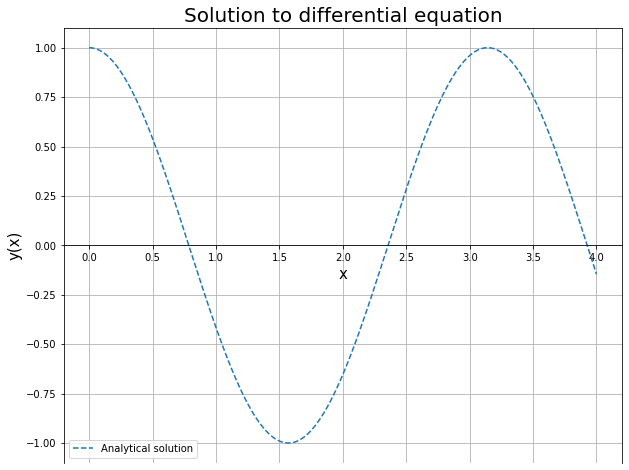

In [ ]:
data={'x' : [x_theory], 'y' : [y_theory], 'label' : ["Analytical solution"], 
      'title':"Solution to differential equation", 'x_label' : 'x', 'y_label' : 'y(x)',
      'axis':True}
graph(data)
# Figure 3 – Analytical solution to ODE

Now we have a function that will plot our approximation. But we still need some function that will judge their acuracy. As I have already mentioned that I will do it based on percentage Root mean square error as we deal with multiple datapoints:

In [ ]:
# measured – approximated numbericaly, theory – analytical solution ("ideal")
def percent_err(measured, theory):
  return np.sqrt(np.mean((theory - measured)**2))*100

###Analysis of a problem

In this experiment we deal with differential equation of second order:
$$ \frac{d^2\!y}{dt^2}=-4y$$
Suppose that exists such $z$ that:
$$\frac{dy}{dt}=z$$
Then, logically, it is obvious that:
$$\frac{dz}{dt}=\frac{d^2\!y}{dt^2}=-4y$$
By doing so, we simplified initial problem to system of ODE-s of first order.
Let $f(y,z) = \frac{dy}{dt}$ and $g(y,z) = \frac{dz}{dt}$, then we have next functions:
$$f(y, z)=z$$
$$g(y, z)=-4y$$
I will write them as `lambda` expressions:

In [ ]:
f = lambda y, z: z
g = lambda y, z: -4*y

Now, we can say that function $f(y,z)$ is a formula of slope for $y$ and function $g(y,z)$ is a formula for slope of $f(y,z)$ or $z$. Those functions are interconnected with each other and by solving $g$, we can solve for $f$ and then $y$. But this will be done later on.

Before starting this experiment, I should write an additional function that will be used in each method and generate initial data each time:

In [ ]:
# data == initial_data – list with t-boundaries and initial values for y and z
# n – number of subintervals

def generate_data(data, n):
  
  # unpack data
  t_i, t_f, y_0, z_0 = data
  
  # calculate delta t
  h = abs(t_f - t_i)/n

  # set initial data for y, z
  y = np.zeros(n, dtype = np.float128)
  z = np.zeros(n, dtype = np.float128)
  y[0], z[0] = y_0, z_0
  
  return h, y, z


###Midpoint method

According to Midpoint Methods the slopes for $y$ and $z$ can be calculated as follows [2, eq. 25.37 p. 730]:
$$y_{i+1}=y_i+k_2\Delta t$$
$k_1=f(y_i,z_i)$ \
$k_2=f(y_i+\frac{1}{2}\Delta t, z_i+\frac{1}{2}k_1\Delta t)$
$$z_{i+1}=z_i+\lambda_2\Delta t$$
$\lambda_1=g(y_i,z_i)$ \
$\lambda_2=g(y_i+\frac{1}{2}\Delta t, z_i+\frac{1}{2}\lambda_1\Delta t)$ \
where $\Delta t$ is calculated as:
$$\Delta t = \frac{t_f-t_i}{n}$$
n – is a number of subintervals and depend on what accuracy we try to achief\
$t_i$ – initial time, $t_f$ – final time


In [ ]:
def coef_midpoint(func, y, z, h):
 
  # calculate slope for function
  k_1 = func(y, z)
  k_2 = func(y + h/2, z + k_1 * h/2)
  
  return k_2 * h


In [ ]:
def midpoint(f, g, data, n, coef):
  
  h, y, z = generate_data(data, n)
  
  for i in range(1, n):    
    # calculate z by formula
    z[i] = z[i-1] + coef(g, y[i-1], z[i-1], h)

    # calculate y by formula
    y[i] = y[i-1] + coef(f, y[i-1], z[i-1], h)

  # y – is numpy array with approximated values of y(t+n*dt) 
  return y

Lets try to assume what is the number of subintervals. Suppose we need 100 subintervals to get needed result. This will allow me to check if the Midpoint method approximates everything correctly

In [ ]:
y_try = midpoint(f, g, initial_data, 100, coef_midpoint)
x_try = np.linspace(t_i, t_f, 100)

y_try_two = midpoint(f, g, initial_data, 300, coef_midpoint)
x_try_two = np.linspace(t_i, t_f, 300)

err = percent_err(y_try, np.cos(2*x_try))
err_two = percent_err(y_try_two, np.cos(2*x_try_two))

print(f"With 100 subintervals, Midpoint method approximated ODE with {err}% rms error\nWith 300 subintervals, Midpoint method approximated ODE with {err_two}% rms error\n")

With 100 subintervals, Midpoint method approximated ODE with 15.430651419725761% rms error
With 300 subintervals, Midpoint method approximated ODE with 4.67548347607112% rms error



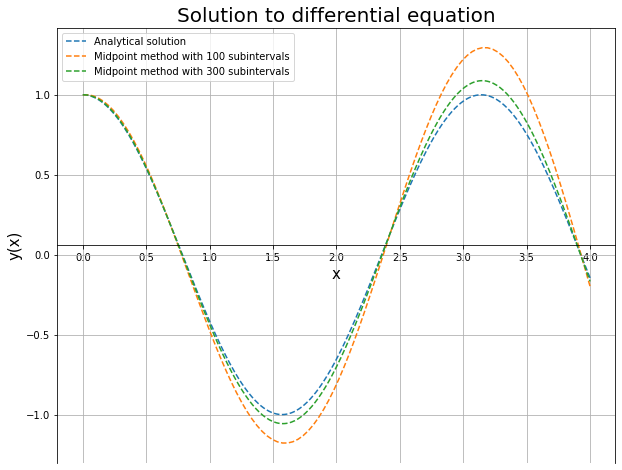

In [ ]:
data={'x' : [x_theory, x_try, x_try_two], 'y' : [y_theory, y_try, y_try_two], 
      'label' : ["Analytical solution", "Midpoint method with 100 subintervals", 
                 "Midpoint method with 300 subintervals"], 
      'title':"Solution to differential equation", 'x_label' : 'x', 'y_label' : 'y(x)', 
      'axis': True}
graph(data)
# Figure 4 – Analytical solution to ODE and attempted approximation of Midpoint Methods

Based on the Figure 4, I can argue that increasing number of subintervals leads to decrease in rms error.

The problem definition requires us to identify such $\Delta t$ that accuracy of approximated solution will be $\approx 0.1\%$. Since $\Delta t$ is dependent on $n$ – number of subintervals, I will identify needed $n$ with brute force approach:

In [ ]:
# func – method_function (midpoint, runge_kutta), data – initial data to unpack
# coef – function to compute coefficients, method – method name for printing

def find(func, data, coef, method):
  err, n_list = [], []
  for n in np.arange(500, 20001, 100):
    
    # numerically approximate solution
    y_exp = func(f, g, data, n, coef)
    
    # calculate theoretical values
    x = np.arange(t_i, t_f, (t_f - t_i)/n)
    y = np.cos(2 * x)
    
    # estimate percetage rms error
    err.append(percent_err(y_exp, y))
    n_list.append(n)
    
    if err[-1]<=eps:
      
      print(f"To achief accuracy of {err[-1]}%<={eps}% {method} requires dt={abs(t_f - t_i)/n}, n={n}")
      
      data={'x' : [n_list], 'y' : [err], 
      'label' : ["rms error of " + method], 
      'title':f"Error vs n for {method}", 'x_label' : 'n, number of subintervals', 'y_label' : 'percentage rms',
      'axis': False }
      
      graph(data)

      return err[-1], n

To achief accuracy of 0.09926504023555846%<=0.1% Midpoint Method requires dt=0.00029850746268656717, n=13400


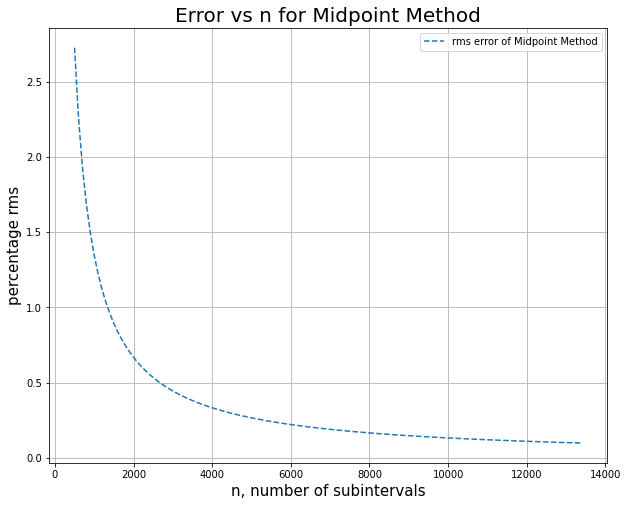

In [ ]:
err_midpoint, n_midpoint  = find(midpoint, initial_data, coef_midpoint, "Midpoint Method")
# Figure 5 – The convergence of rms error of Midpoint Method

Knowing needed $n$, lets measure time needed for Midpoint method to achied required accuracy: 

In [ ]:
time_midpoint = %timeit -o midpoint(f, g, initial_data, n_midpoint, coef_midpoint)

10 loops, best of 5: 66 ms per loop


Store the approximation of Midpoint method for future plotting:

In [ ]:
y_midpoint = midpoint(f, g, initial_data, n_midpoint, coef_midpoint)
x_midpoint = np.linspace(t_i, t_f, n_midpoint)

###Runge-Kutta Third Order

This method is almost the same as Midpoint method except different rules for calculating the slope [2, eq. 25.39 p. 732]. The finction $f(y, z)$ and $g(y, z)$ are the same for all methods, so I will not duplicate it. 

$$y_{i+1}=y_i + \frac{1}{6}(k_1+4k_2+k_3)h$$
$k_1 = f(y_i, z_i)$ \
$k_2 = f(y_i+\frac{1}{2}h, z_i+\frac{1}{2}k_1h)$ \
$k_3 = f(y_i+h, z_i-\frac{1}{2}k_1h+\frac{1}{2}k_2h)$ \

$$z_{i+1}=z_i + \frac{1}{6}(\lambda_1+4\lambda_2+\lambda_3)h$$
$\lambda_1 = g(y_i, z_i)$ \
$\lambda_2 = g(y_i+\frac{1}{2}h, z_i+\frac{1}{2}\lambda_1h)$ \
$\lambda_3 = g(y_i+h, z_i-\frac{1}{2}\lambda_1h+\frac{1}{2}\lambda_2h)$ \



In this experiment we are required to implement Runge-Kutta methods of three different orders. But they are all based on the same principle (only formula for coefficients is different):

In [ ]:
# f – function, h – dt
def coef_third(func, y, z, h):
  
  # slope calculation
  k_1 = func(y, z)
  k_2 = func(y + h/2, z + k_1 * h/2)
  k_3 = func(y + h, z - k_1 * h/2 + k_2 * h/2)

  return  (k_1 + 4 * k_2 + k_3) * h/6

Since Runge-Kutta is almost the same for each order except formula for coefficients, I have decided to implement a general function. Accidentally this is the same as midpoint method.

```
def runge_kutta(f, g, data, n, coef):
  h, y, z = generate_data(data, n)
  for i in range(1, n):    
    # calculate z by formula
    z[i] = z[i-1]+coef(g, y[i-1], z[i-1], h)
    # calculate y by formula
    y[i] = y[i-1]+coef(f, y[i-1], z[i-1], h)
  return y
```
So, we can just copy it this way or use midpoint function with needed coef function:


In [ ]:
runge_kutta = midpoint
runge_kutta

<function __main__.midpoint>

Now, I will try to find out needed number of subintervals using the same function that I implemented while doing Midpoint method: 

To achief accuracy of 0.09956256426999205%<=0.1% Runge-Kutta Third order requires dt=0.0003007518796992481, n=13300


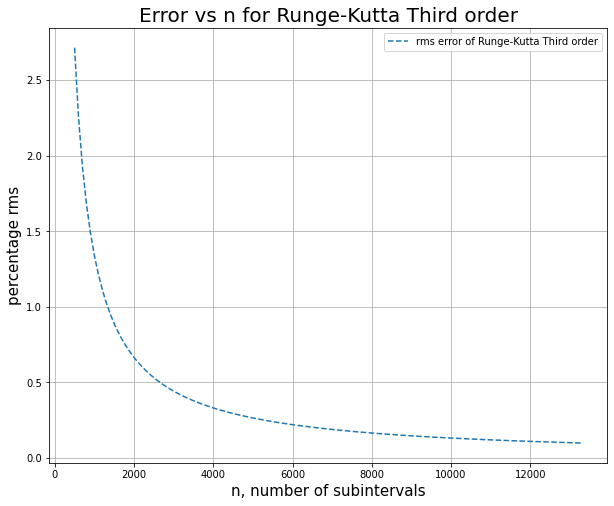

In [ ]:
err_third, n_third = find(runge_kutta, initial_data, coef_third, "Runge-Kutta Third order")
# Figure 6 – The convergence of rms error of Runge-Kutta Third order

Runge-Kutta of third order required less number of subinterval than Midpoint methods, but it requires more calculations.

Time needed for Runge-Kutta third order to achief required accuracy:

In [ ]:
time_third = %timeit -o runge_kutta(f, g, initial_data, n_third, coef_third)

10 loops, best of 5: 132 ms per loop


To achief the same accuracy of Midpoint methods Runge-Kutta of third order required almost twise time of Midpoint methods. Now, I have an intuition that the Midpoint methods will be the most optimal methods for our particular equation. It can be explained by the fact that our ODE has not that difficult solution. But it is too early to judge.

Store nummerical approximation of Runge-Kutta Third order for future plotting:

In [ ]:
y_runge_third = runge_kutta(f, g, initial_data, n_third, coef_third)
x_runge_third = np.linspace(t_i, t_f, n_third)

###Runge-Kutta Fourth Order

With Runge-Kutta Fourth order I repeat the same procedure as with Midpoint method and Runge-Kutta third order, but the formula is different [2, eq. 25.40 p. 733]:
$$y_{i+1}=y_i+\frac{1}{6}(k_1+2k_2+2k_3+k_4)h$$
$k_1 = f(y, z)$ \
$k_2 = f(y+\frac{1}{2}h, z+\frac{1}{2}k_1h)$ \
$k_3 = f(y+\frac{1}{2}h, z+\frac{1}{2}k_2h)$ \
$k_4 = f(y+h, z+k_3h)$

$$z_{i+1}=z_i+\frac{1}{6}(\lambda_1+2\lambda_2+2\lambda_3+\lambda_4)h$$

$\lambda_1 = g(y, z)$ \
$\lambda_2 = g(y+\frac{1}{2}h, z+\frac{1}{2}\lambda_1h)$ \
$\lambda_3 = g(y+\frac{1}{2}h, z+\frac{1}{2}\lambda_2h)$ \
$\lambda_4 = g(y+h, z+\lambda_3h)$

In [ ]:
def coef_fourth(func, y, z, h):
  
  # slope calculation
  k_1 = func(y, z)
  k_2 = func(y + h/2, z + k_1 * h/2)
  k_3 = func(y + h/2, z + k_2 * h/2)
  k_4 = func(y + h, z + k_3 * h)
  
  return (k_1 + 2*(k_2 + k_3) + k_4)*h/6

Identify needed number of subintervals to achief accuracy of $0.1\%$:

To achief accuracy of 0.0992652801980606%<=0.1% Runge-Kutta Fourth order requires dt=0.00029850746268656717, n=13400


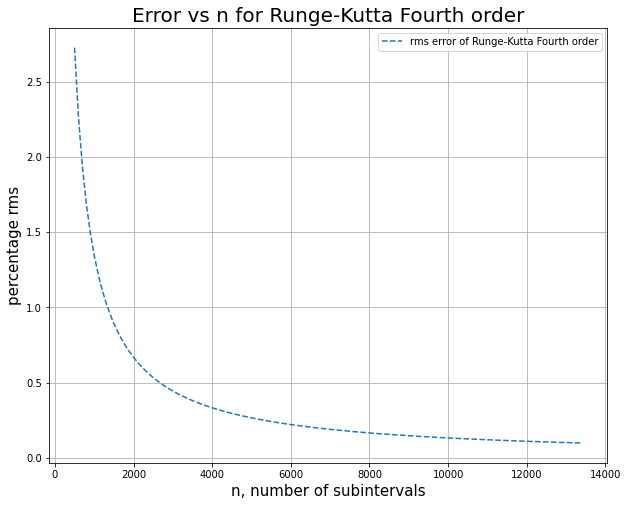

In [ ]:
err_fourth, n_fourth = find(runge_kutta, initial_data, coef_fourth, "Runge-Kutta Fourth order")
# Figure 7 – The convergence of rms error of Runge-Kutta Fourth order

Measure time needed for Runge-Kutta fourth order to achief needed accuracy:

In [ ]:
time_fourth = %timeit -o runge_kutta(f, g, initial_data, n_fourth, coef_fourth)

10 loops, best of 5: 143 ms per loop


The accuracy is the same with Midpoint method and Runge-Kutta of third order, but it required bigger number of subintervals and slightly more time than Runge-Kutta of third order. At the moment, this is the worst result in terms of computational cost.

Store nummerical approximation of Runge-Kutta Fourth order for future plotting:

In [ ]:
y_runge_fourth = runge_kutta(f, g, initial_data, n_fourth, coef_fourth,)
x_runge_fourth = np.linspace(t_i, t_f, n_fourth)

###Runge-Kutta Fifth Order
The formula for Runge-Kutta Fifth order can be found in the book [2, eq. 25.41 p. 735]. The prodecure is the same:

$$y_{i+1}=y_i+\frac{1}{90}(7k_1+32k_3+12k_4+32k_5+7k_6)h$$
$k_1 = f(y, z)$ \
$k_2 = f(y+\frac{1}{4}h, z+\frac{1}{4}hk_1)$ \
$k_3 = f(y+\frac{1}{4}h, z+\frac{1}{8}hk_1+\frac{1}{8}hk_2)$ \
$k_4 = f(y+\frac{1}{2}h, z-\frac{1}{4}hk_2+hk_3)$ \
$k_5 = f(y+\frac{3}{4}h, z+\frac{3}{16}hk_1+\frac{9}{16}hk_4)$ \
$k_6 = f(y+h, z-\frac{3}{7}hk_1+\frac{2}{7}hk_2+\frac{12}{7}hk_3-\frac{12}{7}hk_4+\frac{8}{7}hk_5)$
$$z_{i+1}=z_i+\frac{1}{90}(7\lambda_1+32\lambda_3+12\lambda_4+32\lambda_5+7\lambda_6)h$$
$\lambda_1 = f(y, z)$ \
$\lambda_2 = f(y+\frac{1}{4}h, z+\frac{1}{4}h\lambda_1)$ \
$\lambda_3 = f(y+\frac{1}{4}h, z+\frac{1}{8}h\lambda_1+\frac{1}{8}h\lambda_2)$ \
$\lambda_4 = f(y+\frac{1}{2}h, z-\frac{1}{4}h\lambda_2+h\lambda_3)$ \
$\lambda_5 = f(y+\frac{3}{4}h, z+\frac{3}{16}h\lambda_1+\frac{9}{16}h\lambda_4)$ \
$\lambda_6 = f(y+h, z-\frac{3}{7}h\lambda_1+\frac{2}{7}h\lambda_2+\frac{12}{7}h\lambda_3-\frac{12}{7}h\lambda_4+\frac{8}{7}h\lambda_5)$

In [ ]:
def coef_fifth(func, y, z, h):
  
  # slope calculation
  k_1 = func(y, z)
  k_2 = func(y + h/4, z + k_1 * h/4)
  k_3 = func(y + h/4, z + (k_1 + k_2) * h/8)
  k_4 = func(y + h/2, z - (k_2/4 - k_3) * h)
  k_5 = func(y + 3 * h/4, z + (3 * k_1 + 9 * k_4) * h/16)
  k_6 = func(y + h, z - (3*k_1 - 2*k_2 - 12*(k_3 - k_4) - 8*k_5)*h/7)

  return (7 * (k_1 + k_6) + 32 * (k_3 + k_5) + 12 * k_4) * h/90


Find needed number of subintervals to achief needed accuracy:

To achief accuracy of 0.09944029356329749%<=0.1% Runge-Kutta Fifth order requires dt=0.00029850746268656717, n=13400


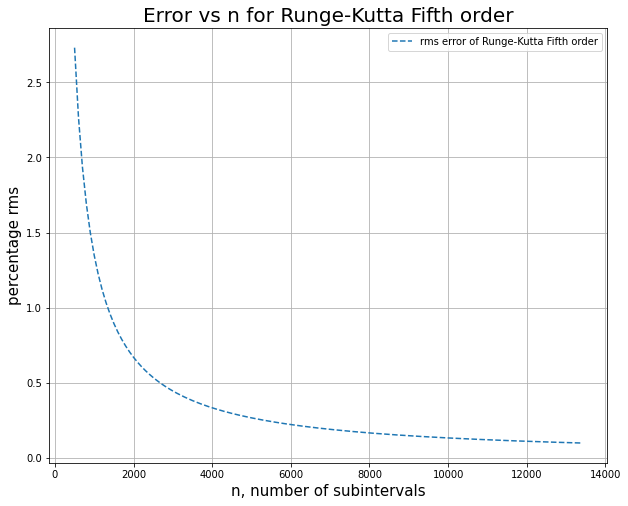

In [ ]:
err_fifth, n_fifth = find(runge_kutta, initial_data, coef_fifth, "Runge-Kutta Fifth order")
# Figure 8 – The convergence of rms error of Runge-Kutta Fifth order

Calculate time needed to achief this accuracy with Runge-Kutta Fifth order:

In [ ]:
time_fifth = %timeit -o runge_kutta(f, g, initial_data, n_fifth, coef_fifth)

1 loop, best of 5: 312 ms per loop


The result of Runge-Kutta Fifth order is the worst in terms of execution time. Maybe the reason for this is a non-efficient implementation of a function that computes coefficients. But still it is obvious that this method even based on formulas computationaly costly.

Store numerical approximation of Runge-Kutta Fifth order for future plotting:

In [ ]:
y_runge_fifth = runge_kutta(f, g, initial_data, n_fifth, coef_fifth)
x_runge_fifth = np.linspace(t_i, t_f, n_fifth)

Since we have approximated our solution with different methods it is time to see their visual representation:


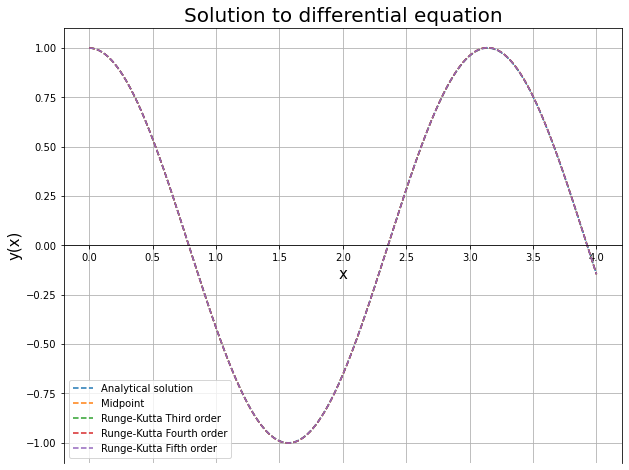

In [ ]:
data = {'x': [x_theory, x_midpoint, x_runge_third, x_runge_fourth, x_runge_fifth], 
      'y':[y_theory, y_midpoint, y_runge_third, y_runge_fourth, y_runge_fifth], 
      'label':["Analytical solution","Midpoint", "Runge-Kutta Third order", 
               "Runge-Kutta Fourth order", "Runge-Kutta Fifth order"], 
      'title':"Solution to differential equation", 'x_label' : 'x', 'y_label' : 'y(x)' ,
      'axis': True}

graph(data)
# Figure 9 – Solutions achieved with different numerical methods

As I have already mentioned in the Methods part since all solutions are approximated to the same accuracy, the graphical method is not useful at judging the efficiency of the alghoritm. But it can confirm that all methods work as they supposed to be.

Information needed for summative table:

In [ ]:
import pandas as pd
data_conclusion = {
    'Method':["Midpoint method", "Runge-Kutta Third order", "Runge-Kutta Fourth order", "Runge-Kutta Fifth order"], 
    'Acuracy (%)':[ err_midpoint, err_third, err_fourth, err_fifth], 
    'Time, ms':[ time_midpoint.best, time_third.best, time_fourth.best, time_fifth.best],
    'n': [ n_midpoint, n_third, n_fourth, n_fifth],
}
table = pd.DataFrame(data_conclusion)
table['dt'] = (t_f-t_i)/table['n']
table['Time, ms']*=1000

---
##Conclusion

In this experiment, I did implementation of Midpoint and Runge-Kutta method of different orders. Their implementations were used in order to solve ODE of second order specified by problem definition. All methods were judged in terms of their acuracy and time eqcutions. The result of all measurements you can see at the Table 1:

In [ ]:
table
# Table 1 – Results of the experiment

,Method,Acuracy (%),"Time, ms",n,dt
0,Midpoint method,0.099265,66.014784,13400,0.000299
1,Runge-Kutta Third order,0.099563,132.014786,13300,0.000301
2,Runge-Kutta Fourth order,0.099265,143.052083,13400,0.000299
3,Runge-Kutta Fifth order,0.099440,311.804366,13400,0.000299


As you can see the Midpoint methods is the most optimal algorythm for solving our particular ODE in terms of both accuracy and time execution. In the begining of the experiment I did an assumption that the accuracy of the implementation should converge with smaller number of subintervals for Runge-Kutta of highier orders. But for some reason all methods required the same number $n$ and $\Delta t$ as well. And as we remember highier order requires more computations. I have checked that the rms error converges in the similar manner for all methods (see Figure 5-8). And my assumption about convergence was wrong. 

However, I may assume that since we try to approximate cosine function, which has small aplitude and the gradient as well, the slopes calculated with highier order methods does not differ much in amplitude. As a result, rms error converge with similar rate for all methods.

Though majority claims that with Runge-Kutta of highier orders we can approximate our solution more accurate and faster, I would like to suggest checking those methods with a particular equation. For our equation it is obvious that Midpoint method is much more convinient.

In the future, I think it would be better to use ODE that has solution other than cosine to see how well methods approximate solutions. But I understand that other equations can have multiple solutions and it can be more difficult to adapt Runge-Kutta to them. 

##Links
[1] Computational Physics Lecture 23, Runge-Kutta Methods. Retrieved from: https://www.youtube.com/watch?v=VfZlcCjTTj4&t=1966s \
[2] Chapra, Steven C. Numerical methods for engineers – 6th ed. Retrieved from: https://drive.google.com/file/d/16qiS5sEiS-ryC6K2XWV-hOuzb9fvHOgu/view?usp=sharing
